# Weight Initialization
First Lets have look at some properties of variance:
## Variance Properties
The variance can also be thought of as the covariance of a random variable with itself:

1) $\operatorname {Var} (X)=\operatorname {Cov} (X,X)$.
 

2) ${\displaystyle {\operatorname {Var} (X)=\operatorname {E} \left[(X-\operatorname {E} [X])^{2}\right]\\[4pt]=\operatorname {E} \left[X^{2}-2X\operatorname {E} [X]+\operatorname {E} [X]^{2}\right]\\[4pt]=\operatorname {E} \left[X^{2}\right]-2\operatorname {E} [X]\operatorname {E} [X]+\operatorname {E} [X]^{2}\\[4pt]=\operatorname {E} \left[X^{2}\right]-\operatorname {E} [X]^{2}}}$

Variance is invariant with respect to changes in a location parameter:

3) $\operatorname {Var} (X+a)=\operatorname {Var} (X).$

If all values are scaled by a constant, the variance is scaled by the square of that constant:

4) $\operatorname {Var} (aX)=a^{2}\operatorname {Var} (X).$


The variance of a sum of two random variables is given by:

5) $\operatorname {Var} (aX+bY)=a^{2}\operatorname {Var} (X)+b^{2}\operatorname {Var} (Y)+2ab\,\operatorname {Cov} (X,Y)$





6) In general, for the sum of ${\displaystyle N}$ random variables $\{X_{1},\dots ,X_{N}\}$, the variance becomes:
$\operatorname {Var} \left(\sum _{i=1}^{N}X_{i}\right)=\sum _{i,j=1}^{N}\operatorname {Cov} (X_{i},X_{j})=\sum _{i=1}^{N}\operatorname {Var} (X_{i})+\sum _{i\neq j}\operatorname {Cov} (X_{i},X_{j})$


7) These results lead to the variance of a linear combination as:


 ${\begin{aligned}\operatorname {Var} \left(\sum _{i=1}^{N}a_{i}X_{i}\right)&=\sum _{i,j=1}^{N}a_{i}a_{j}\operatorname {Cov} (X_{i},X_{j})\\&=\sum _{i=1}^{N}a_{i}^{2}\operatorname {Var} (X_{i})+\sum _{i\not =j}a_{i}a_{j}\operatorname {Cov} (X_{i},X_{j})\\&=\sum _{i=1}^{N}a_{i}^{2}\operatorname {Var} (X_{i})+2\sum _{1\leq i<j\leq N}a_{i}a_{j}\operatorname {Cov} (X_{i},X_{j}).\end{aligned}}$
 
 
8) Sum of uncorrelated variables (Bienaymé formula)

${\displaystyle {\begin{aligned}\operatorname {Var} (X+Y)&=\operatorname {E} \left[X^{2}\right]+2\operatorname {E} [XY]+\operatorname {E} \left[Y^{2}\right]-\left(\operatorname {E} [X]^{2}+2\operatorname {E} [X]\operatorname {E} [Y]+\operatorname {E} [Y]^{2}\right)\\[5pt]&=\operatorname {E} \left[X^{2}\right]+\operatorname {E} \left[Y^{2}\right]-\operatorname {E} [X]^{2}-\operatorname {E} [Y]^{2}\\[5pt]&=\operatorname {Var} (X)+\operatorname {Var} (Y).\end{aligned}}}$


${\displaystyle \operatorname {Var} \left(\sum _{i=1}^{n}X_{i}\right)=\sum _{i=1}^{n}\operatorname {Var} (X_{i}).}$

Refs [1](https://en.wikipedia.org/wiki/Variance#Sum_of_uncorrelated_variables_(Bienaym%C3%A9_formula))

In the followings, we create 50 normal dictribution (`number_of_ditributions=50`), each one containing 1000 samples, and then we start appending them toghether to have new normal distribution, plot the histoggram of the  distribution which again is a normal distribution with $\mu=0$ but with growing $\sigma$ accroding to property number 6.

<IPython.core.display.Javascript object>


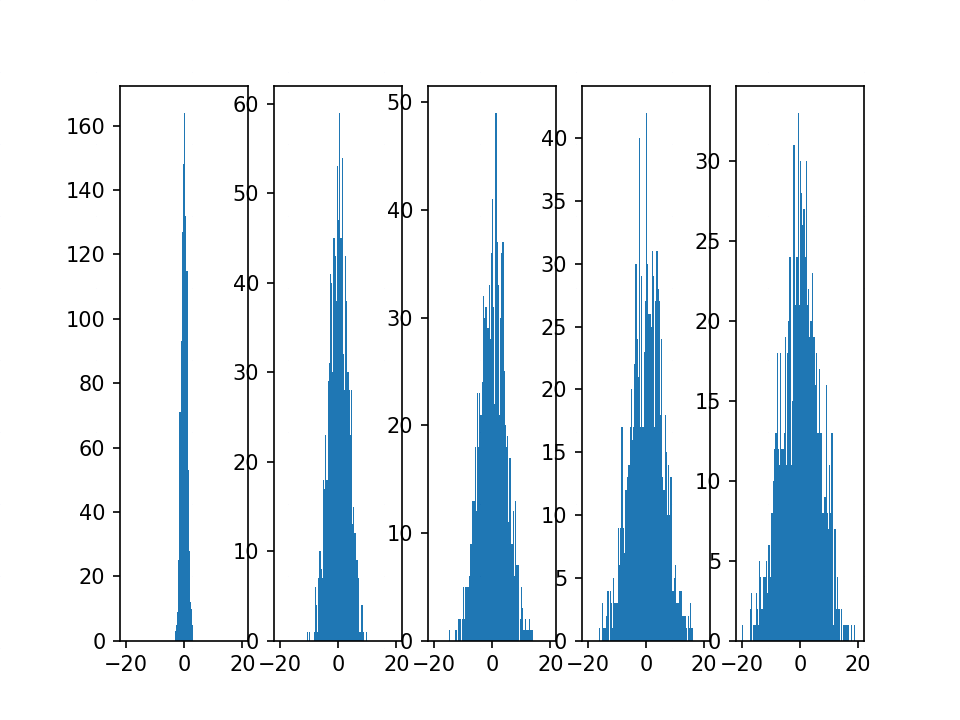

Adding distribution number:  0
Variance is : 0.9915351257339606
Mean is : 0.02913044411122209 

Adding distribution number:  10
Variance is : 3.225808668305728
Mean is : 0.18056843596486055 

Adding distribution number:  20
Variance is : 4.4803197506329315
Mean is : 0.2740070453127518 

Adding distribution number:  30
Variance is : 5.502025457855858
Mean is : 0.2658526209005315 

Adding distribution number:  40
Variance is : 6.357115943452239
Mean is : 0.13376489167654454 



In [3]:
%matplotlib notebook
import numpy as np
import matplotlib.pyplot as plt


x=[]
stds=[]
means=[]

num_cols=5

fig, axes=plt.subplots(nrows=1,ncols=num_cols)
number_of_ditributions=50
for i in np.arange(number_of_ditributions):
        rnd=np.random.randn(1000)
        x.append(rnd)
        means.append(np.mean(rnd))
        stds.append(np.std(rnd))
        if i%(np.round(number_of_ditributions/num_cols) )==0:
                X = np.sum(x, axis=0)
                print("Adding distribution number: ",i)
                print("Variance is :",np.std(X))
                print("Mean is :", np.mean(X),'\n')
                idx=int(i /np.round(number_of_ditributions / num_cols))
                axes[idx].hist(X, 100, range=(-20, 20))

plt.show()

If we set the weights of a neuron $w_j$ from a normal distribution ($\mu=0$ ,$\sigma^2=1$), in the output of the neuron we would have: $z = \sum_j w_j x_j+b$ 
which is weighted sum of inputs. As it can be seen $\sigma$ start getting beigger, which mean the output of neuron $z$, will more likely be far away from $\mu=0$. 


We can see from this graph that it's quite likely that $|z|$ will be pretty large, then the output $\sigma(z)$ from the hidden neuron will be very close to either 1 or 0.  That means our hidden neuron will have saturated (the dreivative for sigmoid function is almost 0).

## Xavier initialization

Suppose we have a neuron with $n_{in}$ input weights. Then we shall initialize those weights as Gaussian random variables with $\mu=0$ and $\sigma=\frac{1}{\sqrt{n_{\rm in}}}$

## He-Kaiming initialization


Refs: [1](http://neuralnetworksanddeeplearning.com/chap3.html#weight_initialization), [2](http://proceedings.mlr.press/v9/glorot10a/glorot10a.pdf?hc_location=ufi]), [3](https://arxiv.org/abs/1312.6120) [4](https://arxiv.org/abs/1412.6558), [5](https://arxiv.org/abs/1502.01852), [6](https://arxiv.org/abs/1511.06856), [7](https://arxiv.org/abs/1511.06422)

In summary, the main difference for machine learning practitioners is the following:

- He initialization works better for layers with ReLu activation.
- Xavier initialization works better for layers with sigmoid activation.

# Pytorch Initialization

### Gain
The gain is a scaling factor for some init functions, It’s used to scale the standard deviation with respect to the applied non-linearity. Since the non-linearity will affect the std dev of the activation, you might run into some issues, e.g. vanishing gradients. The gain with respect to the non-linearity should give you “good” statistics of your activations.

`torch.nn.init.calculate_gain(nonlinearity, param=None)`: Return the recommended gain value for the given nonlinearity function.
Example:

`gain = nn.init.calculate_gain('leaky_relu', 0.2)  # leaky_relu with negative_slope=0.2`

### fan_in, fan_out
It’s basically the number of input and output activations.

For a linear layer layer it would be just `fan_in = in_features` and `fan_out = out_features`.

In [7]:
import torch
print(torch.nn.init._calculate_fan_in_and_fan_out(torch.nn.Linear(10, 2).weight))

(10, 2)


In the case of `nn.Conv2d` it’s a bit more complicated, as you need to calculate receptive field using the kernel size, the `in_channels`, and number of filters:

In [8]:
print(torch.nn.init._calculate_fan_in_and_fan_out(torch.nn.Conv2d(3, 1, 3, 1, 1).weight))


(27, 9)


## Xavier (Glorot initialization) Uniform 
`torch.nn.init.xavier_uniform_(tensor, gain=1.0)`

The tensor will have values sampled from $U(-a,a)$ where: 

$a=gain  \times \sqrt{\frac{6}{fan\_in+fan\_out} }$

In [12]:
w=torch.empty(2,2)
torch.nn.init.xavier_normal_(w,gain=torch.nn.init.calculate_gain('relu'))

tensor([[ 1.0846, -0.1193],
        [ 0.1726, -0.2496]])

##  Xavier (Glorot initialization) Normal
`torch.nn.init.xavier_normal_(tensor, gain=1.0)`

The tensor will have values sampled from $\mathcal{N}(0, \text{std}^2)$ where:

$srd=gain  \times \sqrt{\frac{6}{fan\_in+fan\_out} }$


In [13]:
w = torch.empty(3, 5)
torch.nn.init.xavier_normal_(w,gain=torch.nn.init.calculate_gain('relu'))

tensor([[-0.3072,  0.1500,  1.0832, -0.5174, -0.3356],
        [-0.6490,  0.1691,  0.0540,  0.8222,  1.0756],
        [ 0.5660, -0.1522, -0.1229, -1.3316,  0.3360]])

## He-Kaiming Uniform 
`torch.nn.init.kaiming_uniform_(tensor, a=0, mode='fan_in', nonlinearity='leaky_relu')`

- a : the negative slope of the rectifier used after this layer (only used with 'leaky_relu')
- mode – either 'fan_in' (default) or 'fan_out'. Choosing 'fan_in' preserves the magnitude of the variance of the weights in the forward pass. Choosing 'fan_out' preserves the magnitudes in the backwards pass.

The resulting tensor will have values sampled from $\mathcal{U}(-\text{bound}, \text{bound})$ where

$\text{bound} = \text{gain} \times \sqrt{\frac{3}{\text{fan_mode}}}$


In [14]:
w = torch.empty(3, 5)
torch.nn.init.kaiming_uniform_(w, mode='fan_in', nonlinearity='relu')

tensor([[ 0.0812,  0.7536,  0.9254,  0.9980,  0.4899],
        [ 0.8622, -1.0344,  0.4408,  0.5141, -0.3318],
        [ 0.5110,  1.0873, -0.8102,  0.5653,  0.1790]])

## He-Kaiming Normal 
`torch.nn.init.kaiming_normal_(tensor, a=0, mode='fan_in', nonlinearity='leaky_relu')`

The resulting tensor will have values sampled from $\mathcal{N}(0, \text{std}^2)$ where:

$\text{std} = \frac{\text{gain}}{\sqrt{\text{fan_mode}}}$


In [16]:
w = torch.empty(3, 5)
torch.nn.init.kaiming_normal_(w, mode='fan_in', nonlinearity='relu')

tensor([[ 0.4584, -0.6185,  0.5780,  0.0042,  0.5838],
        [ 0.2776, -0.5779, -0.6509,  0.6068, -0.4694],
        [ 0.0567,  0.4086,  0.8891, -0.0580,  1.0172]])

Refs: [1](https://pytorch.org/docs/stable/nn.init.html)

## Pytorch Default Initialization Method

PyTorch’s initialization is based on the layer type, not the activation function (the layer doesn’t know about the activation upon weight initialization). All the layer are implemented [here](https://github.com/pytorch/pytorch/blob/master/torch/nn/modules/linear.py). 
For instance for `torch.nn.Linear` the default values for the weights are
 initialized from: 
$\mathcal{U}(-\sqrt{k}, \sqrt{k})$ where $k = \frac{1}{in\_features}$

```stdv = 1. / math.sqrt(self.weight.size(1))
self.weight.data.uniform_(-stdv, stdv)
if self.bias is not None:
    self.bias.data.uniform_(-stdv, stdv)```

From PyTorch 1.0, most layers are initialized using Kaiming Uniform method. Example layers include Linear, Conv2d, RNN etc. If you are using other layers, you should look up that layer [here](https://pytorch.org/docs/stable/nn.html). If it says weights are initialized using `U(...)` then its Kaiming Uniform method. 